In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
dataset = pd.read_csv("iris.csv")
dataset.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
clust_data = dataset.iloc[:,:-1]

In [4]:
from sklearn.cluster import KMeans

In [5]:
ssd = []
for k in range(1,15):
    km = KMeans(n_clusters=k).fit(clust_data)
    ssd.append(km.inertia_)

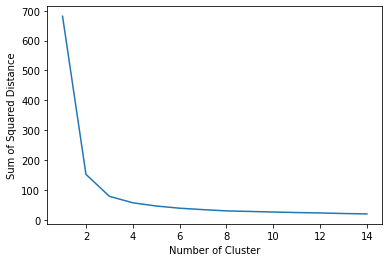

In [6]:
plt.plot(range(1,15),ssd)
plt.xlabel("Number of Cluster")
plt.ylabel("Sum of Squared Distance")
plt.show()

In [8]:
cluster = 3

k_value = KMeans(n_clusters=3).fit(clust_data)
pred = k_value.predict(clust_data)
centriods = k_value.cluster_centers_

print(centriods)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [10]:
pd.crosstab(dataset.iloc[:,4],k_value.labels_)

col_0,0,1,2
Species,,,
0,0,50,0
1,48,0,2
2,14,0,36


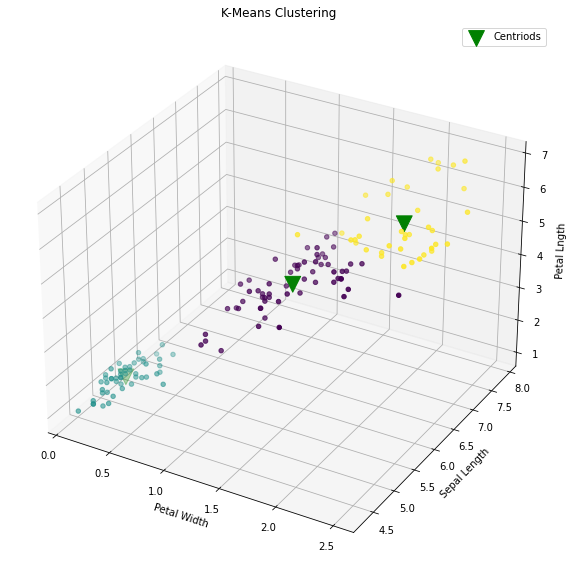

In [46]:
fig = plt.figure(figsize=(15,10))
ax= fig.add_subplot(111,projection='3d')
scatter = ax.scatter(k_value.cluster_centers_[:,3],k_value.cluster_centers_[:,0],k_value.cluster_centers_[:,2],s=250,marker='v',c='g',label ="Centriods")

scatter = ax.scatter(dataset["Petal.Width"],dataset["Sepal.Length"],dataset["Petal.Length"],c=pred,s=20)
ax.set_title("K-Means Clustering")
ax.set_xlabel("Petal Width")
ax.set_ylabel("Sepal Length")
ax.set_zlabel("Petal Lngth")
ax.legend()
plt.show()